In [1]:
import numpy as np
import matplotlib.pyplot as plt
import pandas as pd

In [13]:
import numpy as np
import matplotlib.pyplot as plt
import pandas as pd

if __name__ == '__main__':
    path = ['AAL', 'AAPL', 'AMZN', 'BAC', 'F',
            'GOOG', 'IBM', 'INTC', 'NVDA', 'XOM']
    df = {}
    start = pd.to_datetime('01-08-2023', dayfirst=True)
    end = pd.to_datetime('7-8-2023', dayfirst=True)
    for i in path:
        df[i] = pd.read_csv('Data/' + i + '.csv', sep=';', decimal='.',
                            usecols=['Date', 'Close'])
        df[i]['Date'] = pd.to_datetime(df[i]['Date'], dayfirst=True)
        df[i] = df[i][(df[i]['Date'] >= start )  & (df[i]['Date'] <= end)]


5


In [4]:
for i in path:
        a = np.where(df[i]['Close'] > df[i]['Close'].shift(-1), 1, 0)
        a[0] = 0
        df[i]['Gain'] = np.where(
            a == 1, df[i]['Close'] - df[i]['Close'].shift(-1), 0)
df['AAL'].to_csv('teste.csv', index=False)


In [9]:
diff = pd.Series(df['AAPL']['Close'].diff())
diff.where(diff>0,0)

9847     0.000000
9848     0.000000
9849     0.592499
9850     0.000000
9851     1.199997
           ...   
10598    0.000000
10599    0.000000
10600    0.000000
10601    3.570000
10602    0.319992
Name: Close, Length: 756, dtype: float64

In [40]:
import numpy as np

from pymoo.algorithms.soo.nonconvex.ga import GA
from pymoo.core.problem import Problem
from pymoo.operators.crossover.sbx import SBX
from pymoo.operators.mutation.pm import PM
from pymoo.operators.repair.rounding import RoundingRepair
from pymoo.operators.sampling.rnd import IntegerRandomSampling
from pymoo.optimize import minimize


class MyProblem(Problem):

    def __init__(self):
        super().__init__(n_var=2, n_obj=1, n_ieq_constr=1, xl=0, xu=10, vtype=int)

    def _evaluate(self, x, out, *args, **kwargs):
        out["F"] = - np.min(x * [3, 1], axis=1)
        out["G"] = x[:, 0] + x[:, 1] - 10


problem = MyProblem()

method = GA(pop_size=10,
            sampling=IntegerRandomSampling(),
            crossover=SBX(prob=1.0, eta=3.0, vtype=float, repair=RoundingRepair()),
            mutation=PM(prob=1.0, eta=3.0, vtype=float, repair=RoundingRepair()),
            eliminate_duplicates=True,
            )

res = minimize(problem,
               method,
               termination=('n_gen', 100),
               save_history=True
               )

print("Best solution found: %s" % res.X)
print("Function value: %s" % res.F)
print("Constraint violation: %s" % res.CV)

Best solution found: [3 7]
Function value: [-7.]
Constraint violation: [0.]


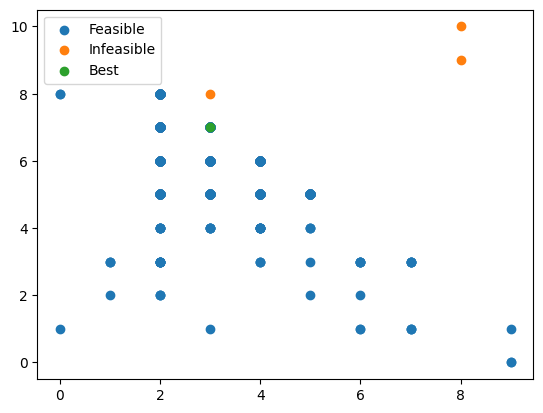

In [41]:
import matplotlib.pyplot as plt
from pymoo.util import plotting

_X = np.row_stack([a.pop.get("X") for a in res.history])
feasible = np.row_stack([a.pop.get("feasible") for a in res.history])[:, 0]

plotting.plot(_X[feasible], _X[np.logical_not(feasible)], res.X[None,:]
              , labels=["Feasible", "Infeasible", "Best"])

In [8]:
a = []
for i in range(0,6):
    a = np.append(a,i)

a.sum()

15.0

In [14]:
(184.12-175.84)/175.84

0.04708826205641493